<function __main__.kfit>

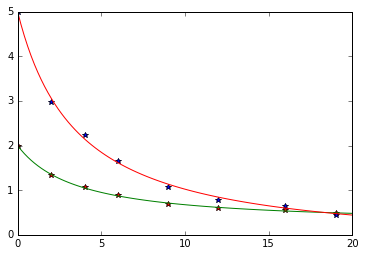

In [131]:
from __future__ import division
import sympy
import numpy
%matplotlib inline
from scipy.integrate import odeint
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
sympy.init_printing(use_latex='mathjax')
from IPython.html.widgets import interact

#DEMO
Cae = numpy.array([2.000, 1.3286, 1.0812, 0.8880, 0.6908, 0.5904, 0.5497, 0.4801], dtype=float)
traw = numpy.array([0, 2, 4, 6, 9, 12, 16, 19], dtype=float)
Cbo = 5.0
Cbe = Cbo - 3*(Cae[0] - Cae)
Cce = 0 + 4*(Cae - Cae[0])

plt.plot(traw, Cae, 'r*', 
     traw, Cbe,'b*')

def kfit(k, n=1, m=1):
    def intfun(c, t):
        return [-k*(c[0]**m)*(c[1]**n),
                -3.0*k*(c[0]**m)*(c[1]**n)]
    ti = numpy.linspace(0, 20, 100)
    Ci = odeint(intfun, [Cae[0], Cbo], ti)

    plt.plot(traw, Cae, 'r*',
         traw, Cbe, 'b*',
         ti, Ci[:,0], 'g',
         ti, Ci[:,1], 'r')
    
interact(kfit, k=(0.01, 0.1, 0.01), n=[1, 3, 1], m=[1, 3, 1])

#TUTORIAL 1

##Question 1

The rate will be the same: -rA = 2 (CA^0.5)*(CB) because the reaction is not elementary

##Question 2

The ratio r1:r2 will stay constant as composition changes because only k1 and k2 are functions of temperature.

r1/r2 = k1/k2

##Question 3

In [115]:
# done on paper

Question 4

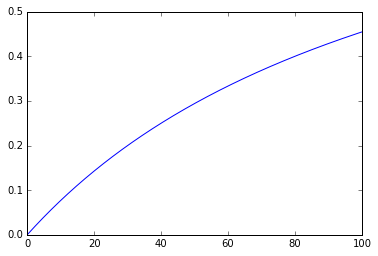

51.4351435144
51.4451445145


In [116]:
Cao = 5 #mol/l
Cbo = 5 #mol/l
xa = 0.30
k = 0.1/60 #l/mol min

t = numpy.linspace(0,100,10000)

def conversion(x,t):
    return k*Cao*(1-x)*(Cbo-x*Cao)*(1/Cao)

x = odeint(conversion,0,t)
plt.plot(t,x)
plt.show()

for x_val, y_val in zip(t,x):
    if y_val > 0.29999 and y_val < 0.3001:
        print(x_val)

The time it took to convert 30% of A was 51.4 min

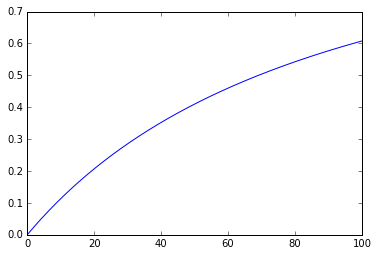

32.0532053205


In [117]:
#if Cbo changed to 7.5
Cbo = 7.5 #mol/l

x2 = odeint(conversion,0,t)
plt.plot(t,x2)
plt.show()

for x_val, y_val in zip(t,x2):
    if y_val > 0.29999 and y_val < 0.3001:
        print(x_val)

It takes now 32.05 min to convert 30% of A if the concentration of B changes to 7.5 mol/l

Question 5

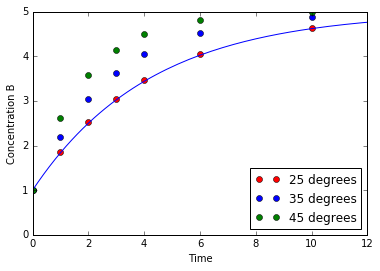

In [118]:
Cao = 2 #mol/l
Cbo = 1 #mol/l
texp = numpy.array([0,1,2,3,4,6,10,200])
Cb25 = numpy.array([1,1.85,2.53,3.05,3.47,4.05,4.64,5])
Cb35 = numpy.array([1,2.20,3.04,3.63,4.04,4.53,4.89,5])
Cb45 = numpy.array([1,2.61,3.57,4.15,4.49,4.82,4.98,5])

plt.figure(1)
plt.plot(texp,Cb25,'ro',label='25 degrees')
plt.plot(texp,Cb35,'bo',label='35 degrees')
plt.plot(texp,Cb45,'go',label='45 degrees')
plt.legend(loc='best')
plt.ylabel('Concentration B')
plt.xlabel('Time')
plt.axis([0,12,0,5])

k = 0.235
def Conc(C,t):
    ra = -k*C[0]
    rb = -2*ra  
    dCadt = ra
    dCbdt = rb
    return [ dCadt, dCbdt]
t = numpy.linspace(0,200,1000)
C = odeint(Conc,[Cao,Cbo],t)
plt.plot(t,C[:,1])
plt.show()

k45 = 0.5

k35 = 0.35

k25 = 0.235

Work with the formula K = K0*exp(-E/RT) to find K75

In [119]:
k75 = 1.324
Cao = 4

def conversion(x,t):
    return k75*Cao*(1-x)*(1/Cao)

t = numpy.linspace(0,5,100000)
x = odeint(conversion,0,t)

for x_val, y_val in zip(t,x):
    if y_val > 0.499999 and y_val < 0.5001:
        print(x_val)

0.523555235552
0.523605236052
0.523655236552


The time it takes for 50% of A to convert at 75 degrees is approximately 0.52 min.

Question 6

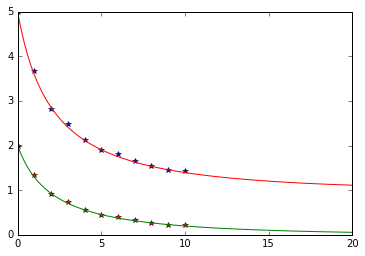

In [132]:
Cae = numpy.array([2.000, 1.34, 0.91,0.74,0.56,0.45,0.40,0.33,0.27,0.23,0.21], dtype=float)
traw = numpy.array([0,1,2,3,4,5,6,7,8,9,10], dtype=float)
Cao = 2.0 #mol/l
Cbo = 5.0 #mol/l
Ccat = 2 #g/l
Cbe = Cbo - 2*(Cae[0] - Cae)
Cce = 0 + 1*(Cae[0] - Cae)

#plt.plot(traw, Cae, 'r*', label='experimental Ca') 
#plt.plot(traw, Cbe,'b*',label='experimental Cb')

def kfit(k, n=1, m=1):
    def intfun(c, t):
        return [-k*(c[0]**m)*(c[1]**n)*Ccat,
                -2.0*k*(c[0]**m)*(c[1]**n)*Ccat]
    ti = numpy.linspace(0, 20, 100)
    Ci = odeint(intfun, [Cae[0], Cbo], ti)

    plt.plot(traw, Cae, 'r*')
    plt.plot(traw, Cbe, 'b*')
    plt.plot(ti, Ci[:,0], 'g')
    plt.plot(ti, Ci[:,1], 'r')
    
interact(kfit, k=(0.01, 1, 0.001), n=[0, 3, 0.1], m=[0, 3, 0.1])

n = 0.33    m = 1.4   k = 0.11

or

n = 1       m = 1     k = 0.052

TUTORIAL 2

Question 2

In [134]:
timexp = numpy.array([0,0.5,1,1.5,2,2.5,3,3.5,4,5,6,7,8],dtype=float)
Pexp = numpy.array([1.3,1.5,1.65,1.76,1.84,1.90,1.95,1.99,2.025,2.08,2.12,2.15,2.175],dtype=float)

R = 0.0820578 #L atm/ mol K
T = 373.15 #K
Nto = 100 #mol Basis
V = Nto*R*T/Pexp[0]
V #L

2355.37446692

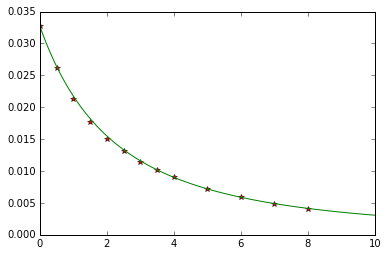

In [135]:
Nt = Pexp*V/(R*T)
Nao = 76.94
Ni = 23.06
Cao = Nao/V
Na = -(Nt - Nto - Nao)
Ca = Na/V

def kfit(k, m=1):
    def intfun(ca, t):
        return -k*(ca**m)
    ti = numpy.linspace(0, 10, 100)
    Ci = odeint(intfun, Cao, ti)

    plt.plot(timexp, Ca, 'r*')
    plt.plot(ti, Ci, 'g')
    
interact(kfit, k=(0.01, 5, 0.001), n=[0, 3, 0.1], m=[0, 3, 0.1])

m = 1.5 and k = 2.5

Question 3

In [136]:
timexp = numpy.array([0,8,16,24,32,40,48], dtype = float)
yinert = numpy.array([0.2,0.209,0.218,0.228,0.240,0.252,0.266], dtype = float)
V = 1 #L
Pto = 200 #kPa
R = 8.314 #L KPa / mol K
T = 373.15 #K
Nto = Pto*V/(R*T)
Nao = 0.40*Nto
Nbo = 0.40*Nto
Ni = 0.20*Nto
xb=1 #full conversion
Nt = Nto - (2/3)*Nbo*xb
Pt = (Nt/Nto)*Pto
Pt

146.66666666666669

Total pressure at infinite time when conversion is 100% is 146.7 kPa

In [137]:
#24 min at position 3
yi_24 = yinert[3]
Nt = Ni/yi_24
#use same Nt formula used above to find conversion
xb = (Nt-Nto)/((-2/3)*Nbo)
xb

0.460526315789

Conversion of B at 24 min is 46%.

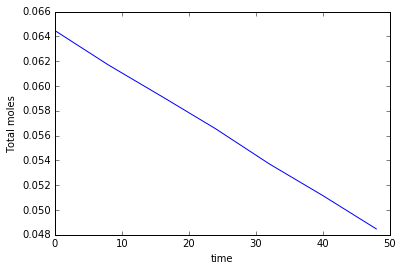

In [138]:
Ntarray = Ni/yinert
plt.plot(timexp,Ntarray, 'b-', label='Total moles')
plt.xlabel('time')
plt.ylabel('Total moles')
plt.show()

The plot shows a straight line, which means that the rate fucntion is of zero power. dN/dt = ra*V . ra must be a constant so the slope is a straight line.

In [139]:
xb = (Ntarray-Nto)/((-2/3)*Nbo)

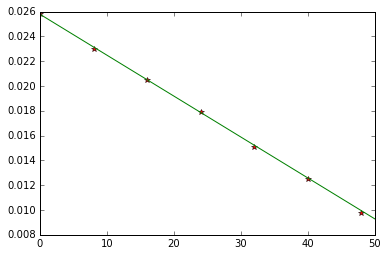

In [140]:
Ca = (Nao - (2/3)*Nbo*xb)/V
Cao = Nao/V
Cbo = Nbo/V
def kfit(k,n=0, m=0):
    def intfun(c, t):
        return [-k*(c[0]**m)*(c[1]**m),
                -(3/2)*k*(c[0]**m)*(c[1]**m)]
    ti = numpy.linspace(0, 50, 100)
    Ci = odeint(intfun,[Cao,Cbo], ti)

    plt.plot(timexp, Ca, 'r*')
    plt.plot(ti, Ci[:,0], 'g')
interact(kfit, k=(0.0001, 0.0005, 0.00001), n=[0, 3, 0.1], m=[0, 3, 0.1])

The kinetics where found to be m=n=0 and k = 0.00033 molA/min*l

TUTORIAL 3

Question 1

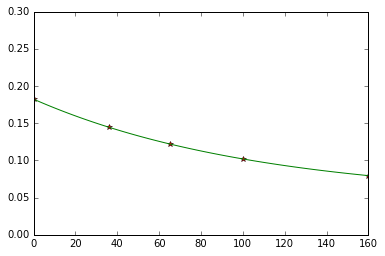

In [141]:
timexp = numpy.array([0,36,65,100,160,10000], dtype=float)
Caexp = numpy.array([0.1823,0.1453,0.1216,0.1025,0.0795,0.0494], dtype=float)
Cao = 0.1823 #mol/l
Cro = 0
Cso = 55 #mol/l
Ca_inf = Caexp[5] #mol/l
Cr_inf = Cro + (Cao - Ca_inf)
Cs_inf = Cso + (Cao - Ca_inf)
Kc = (Cr_inf*Cs_inf)/Ca_inf

def kfit(k):
    def intfun(ca, t):
        return -k*ca + (k/Kc)*(Cro + (Cao - ca))*(Cso + (Cao - ca))
    ti = numpy.linspace(0, 160, 100)
    Ci = odeint(intfun,Cao, ti)

    plt.plot(timexp, Caexp, 'r*')
    plt.plot(ti, Ci, 'g')
    plt.axis([0,160,0,0.3])
interact(kfit, k=(0.002, 0.01, 0.00001))
Kc

In [129]:
k2 = 0.00676/Kc
k2

4.55761700524e-05

k1 was fitted as 0.00676  and k2 was found to be 4.55e-5.

Question 2

<function __main__.kfit>

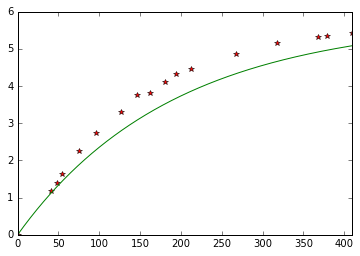

In [173]:
Cce = numpy.array([0,1.18,1.38,1.63,2.24,2.75,3.31,3.76,3.81,4.11,4.31,4.45,4.86,5.15,5.32,5.35,5.42,5.80], dtype=float)
traw1 = numpy.array([0,41,48,55,75,96,127,146,162,180,194,212,267,318,368,379,410,10000], dtype=float)
Cao = 5.5
Cbo = 5.5
plt.plot(traw1, Cce, 'r*')

Cc_inf = 5.80
Ca_inf = (Cc_inf/2)-Cao
Cb_inf = Cbo - (Cao - Ca_inf)
Kc = Cc_inf**2/(Ca_inf*Cb_inf)

def kfit(k):
    def intfun(c, t):
        return [-k*(c[0])*(c[1]) + (k/Kc)*(c[2]**2),
                -k*(c[0])*(c[1]) + (k/Kc)*(c[2]**2),
               2.0*(k*(c[0])*(c[1]) - (k/Kc)*(c[2]**2))]
    
    ti = numpy.linspace(0, 410, 10000)
    Ci = odeint(intfun, [Cao, Cbo,0], ti)

    plt.plot(traw1, Cce, 'r*',
         ti, Ci[:,2], 'g')
    plt.axis([0,410,0,6])
plt.show()
interact(kfit, k=(0.00001, 0.001, 0.000001), n=[1, 3, 1], m=[1, 3, 1])


k1 was fitted to be 0.00067 and Kc = 4.98

Question 3

In [174]:
T1 = 294.15 # K
Kc1 = 68.1
DH = -85000 #J/mol
Cao = 0.2
Cbo = 0.5
Cco = 0.15
T2 = 323.15 #K
R = 8.314 #J/mol K

Kc2 = numpy.exp(numpy.log(Kc1)-(DH/R)*((1/T2)-(1/T1)))

def func(x):
    return Kc2 - (Cco+Cao*x)/((Cao-Cao*x)*((Cbo-2*Cao*x)**2))
x = fsolve(func,0.5)
x

array([ 0.00082164])

Conversion was found to be very low. x = 0.00082164 -> 0.082164%.

In [175]:
x = 0.5
Kc3 = (Cco+Cao*x)/((Cao-Cao*x)*((Cbo-2*Cao*x)**2))
def func2(T3):
    return numpy.log(Kc2/Kc3)+(DH/R)*((1/T2)-(1/T3))
T3 = fsolve(func2,100)
T3,Kc3

(array([ 301.94018606]), 27.77777777777778)

Kc3 = 27.8 and T3 = 28.8 C

Curve profiles are a sketch. no need to plot

Question 4

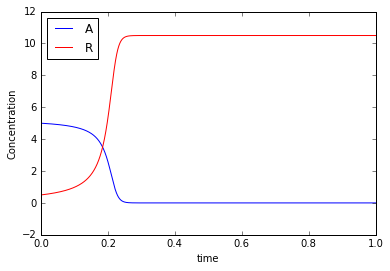

In [203]:
Cao = 5
Cro = 0.5
Camax = 1.75
Crmax = 7
k=1
def c(c,t):
    ra = -c[0]*((Cro+2*(Cao-c[0]))**2)
    rr = -2*ra
    
    dCadt = ra
    dCrdt = rr
    return [dCadt,dCrdt]
t = numpy.linspace(0,1,10000)
c = odeint(c,[Cao,Cro],t)
plt.figure(2)
plt.plot(t,c[:,0],'b-',label='A')
plt.plot(t,c[:,1],'r-',label='R')
plt.ylabel('Concentration')
plt.legend(loc='best')
plt.xlabel('time')
plt.show()

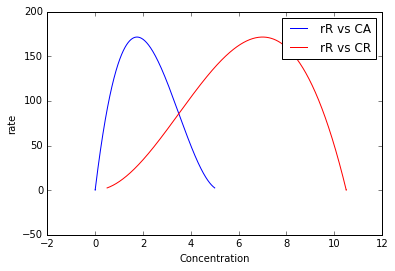

In [207]:
ra = -c[:,0]*((Cro+2*(Cao-c[:,0]))**2)
rr = -2*ra
plt.figure()
plt.plot(c[:,0],rr,'b-',label='rR vs CA')
plt.plot(c[:,1],rr,'r-',label='rR vs CR')
plt.ylabel('rate')
plt.xlabel('Concentration')
plt.legend(loc='best')
plt.show()

In [208]:
for x_val, y_val in zip(c[:,0],rr):
    if y_val == max(rr):
        print(x_val)

1.75076364744


In [209]:
for x_val, y_val in zip(c[:,1],rr):
    if y_val == max(rr):
        print(x_val)

6.99847270513


Calculated values of A and R that will maximize R.

CA = 1.75 and CR = 7